##  Data description 

The current datasets has been collected from the following link-
https://archive.ics.uci.edu/ml/datasets/Sales_Transactions_Dataset_Weekly

The dataset contains weekly purchased quantities of 800 over products over 52 weeks.
It has 811 instances and 53 attributes


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set

import numpy as np
import pandas as pd

In [5]:
import plotly.graph_objects as go
import chart_studio.plotly as py
#import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

# option for pandas to display the columns
pd.options.display.max_columns=30

# setting the notebook mode for plotly
init_notebook_mode(connected=True)
#cf.go_offline(connected=True)

# setting theme in cufflinks
#cf.set_config_file(theme="pearl")


Basic steps in brief- 
- to see which products or which weeks they sold the most (by using Groupby week or group by product)

- Line chart to show how the total product sold over week
 - Percentage change each week
 - Resample by 2 or 4 weeks

In [6]:
data=pd.read_csv("Sales_Transactions_Dataset_Weekly.csv")
data.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,...,Normalized 37,Normalized 38,Normalized 39,Normalized 40,Normalized 41,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,14,11,14,16,9,...,0.33,0.50,0.78,0.22,0.44,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,3,2,2,6,2,...,0.20,0.70,0.30,0.20,0.50,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,6,14,9,4,7,...,0.82,0.82,0.55,0.00,0.18,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,11,8,4,5,4,...,0.24,0.35,0.35,0.59,0.24,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,9,11,18,8,4,...,0.33,0.33,0.13,0.13,0.33,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


Index(['Product_Code', 'W0', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8',
       'W9', 'W10', 'W11', 'W12', 'W13', 'W14', 'W15', 'W16', 'W17', 'W18',
       'W19', 'W20', 'W21', 'W22', 'W23', 'W24', 'W25', 'W26', 'W27', 'W28',
       'W29', 'W30', 'W31', 'W32', 'W33', 'W34', 'W35', 'W36', 'W37', 'W38',
       'W39', 'W40', 'W41', 'W42', 'W43', 'W44', 'W45', 'W46', 'W47', 'W48',
       'W49', 'W50', 'W51'],
      dtype='object')

#### Dropping the inessential columns 

Two ways to slice to select the data frame;
1.drop the unwanted columnes/rows:
data.drop(df.iloc[:, 55:107], inplace = False, axis = 1)

OR-

slice the desired row/columns:: data.iloc[:,:53]

In [7]:
data=data.iloc[:,:53]

In [8]:
data.shape  #811, 53


(811, 53)

In [ ]:
data.describe()

## # Check missing value 
No missing value found

In [10]:
data.isna().sum().sum()

0

In [ ]:
data.describe()

In [11]:
data.columns

Index(['Product_Code', 'W0', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8',
       'W9', 'W10', 'W11', 'W12', 'W13', 'W14', 'W15', 'W16', 'W17', 'W18',
       'W19', 'W20', 'W21', 'W22', 'W23', 'W24', 'W25', 'W26', 'W27', 'W28',
       'W29', 'W30', 'W31', 'W32', 'W33', 'W34', 'W35', 'W36', 'W37', 'W38',
       'W39', 'W40', 'W41', 'W42', 'W43', 'W44', 'W45', 'W46', 'W47', 'W48',
       'W49', 'W50', 'W51'],
      dtype='object')

## Tidying the data

In [15]:
data=data.melt(id_vars= "Product_Code", var_name="week")
data.head(10)

,Product_Code,week,value
0,P1,W0,11
1,P2,W0,7
2,P3,W0,7
3,P4,W0,12
4,P5,W0,8
5,P6,W0,3
6,P7,W0,4
7,P8,W0,8
8,P9,W0,14
9,P10,W0,22


In [16]:
data.pivot_table(index= ["Product_Code", "week"], values="value", aggfunc=sum)

value
Product_Code week       
P1           W0       11
             W1       12
             W10      11
             W11      14
             W12      16
             W13       9
             W14       9
             W15       9
             W16      14
             W17       9
             W18       3
             W19      12
             W2       10
             W20       5
             W21      11
             W22       7
             W23      12
             W24       5
             W25       9
             W26       7
             W27      10
             W28       5
             W29      11
             W3        8
             W30       7
             W31      10
             W32      12
             W33       6
             W34       5
             W35      14
...                  ...
P99          W29       9
             W3       21
             W30       9
             W31       6
             W32       8
             W33       8
             W34       3
             W35       9
             W36       4
             W37      11
             W38       7
             W39       5
             W4        9
             W40      12
             W41       8
             W42       6
             W43       8
             W44      11
             W45       8
             W46       8
             W47       8
             W48      10
             W49       7
             W5        5
             W50       9
             W51      11
             W6       12
             W7       15
             W8       11
             W9        9

[42172 rows x 1 columns]

### Grouping the data using Pandas groupby method 

In [18]:
p_code=data.groupby('Product_Code')
Week=data.groupby("week")





In [20]:
data["Product_Code"].max() #p99 has the highest sell

'P99'

In [21]:

data["week"].max()    #week 9 has highest sell 


'W9'

C:\Users\Owner\Anaconda3\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



week
W0     AxesSubplot(0.125,0.125;0.775x0.755)
W1     AxesSubplot(0.125,0.125;0.775x0.755)
W10    AxesSubplot(0.125,0.125;0.775x0.755)
W11    AxesSubplot(0.125,0.125;0.775x0.755)
W12    AxesSubplot(0.125,0.125;0.775x0.755)
W13    AxesSubplot(0.125,0.125;0.775x0.755)
W14    AxesSubplot(0.125,0.125;0.775x0.755)
W15    AxesSubplot(0.125,0.125;0.775x0.755)
W16    AxesSubplot(0.125,0.125;0.775x0.755)
W17    AxesSubplot(0.125,0.125;0.775x0.755)
W18    AxesSubplot(0.125,0.125;0.775x0.755)
W19    AxesSubplot(0.125,0.125;0.775x0.755)
W2     AxesSubplot(0.125,0.125;0.775x0.755)
W20    AxesSubplot(0.125,0.125;0.775x0.755)
W21    AxesSubplot(0.125,0.125;0.775x0.755)
W22    AxesSubplot(0.125,0.125;0.775x0.755)
W23    AxesSubplot(0.125,0.125;0.775x0.755)
W24    AxesSubplot(0.125,0.125;0.775x0.755)
W25    AxesSubplot(0.125,0.125;0.775x0.755)
W26    AxesSubplot(0.125,0.125;0.775x0.755)
W27    AxesSubplot(0.125,0.125;0.775x0.755)
W28    AxesSubplot(0.125,0.125;0.775x0.755)
W29    AxesSubplot(0.125,0.

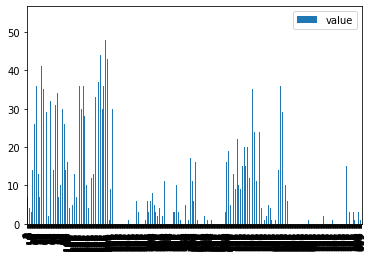

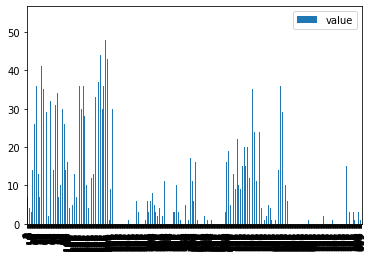

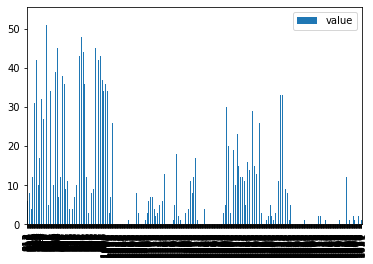

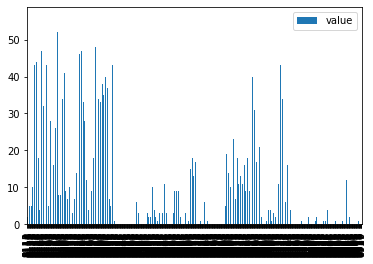

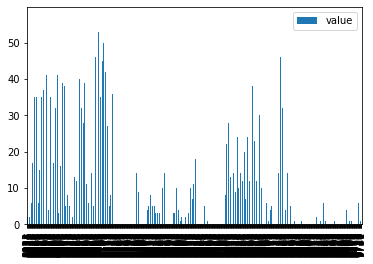

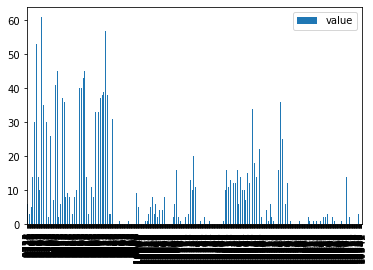

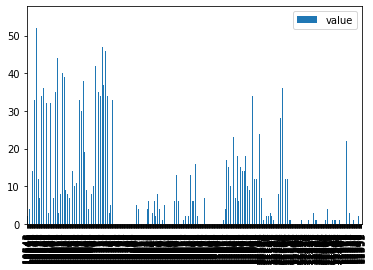

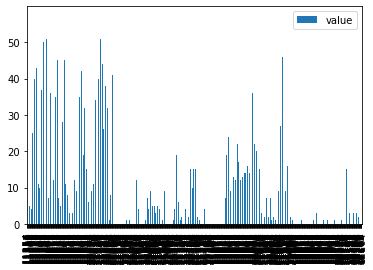

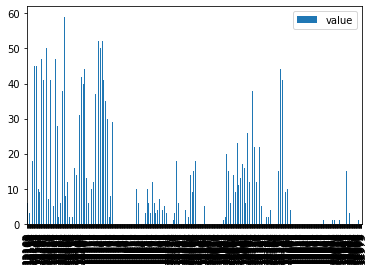

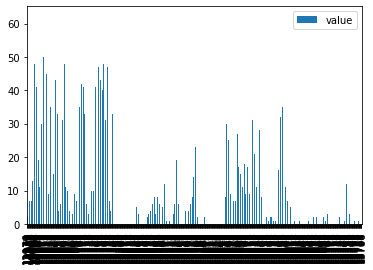

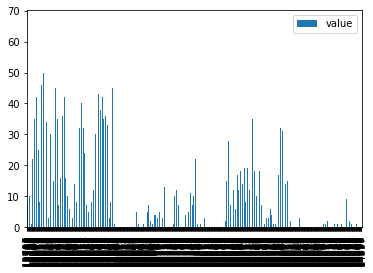

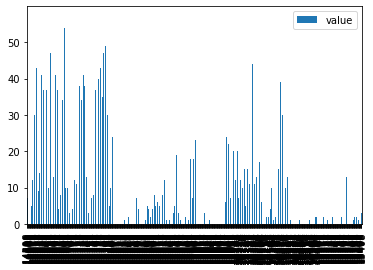

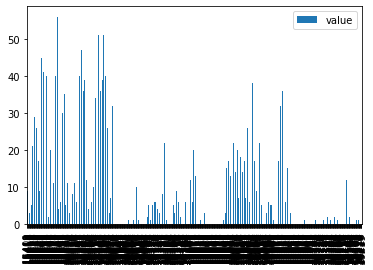

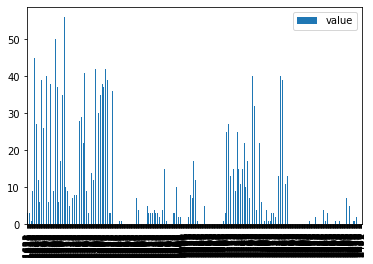

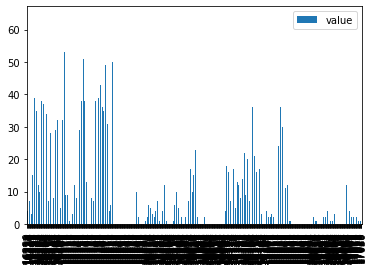

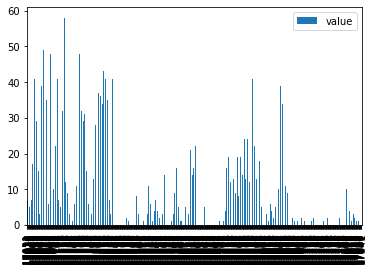

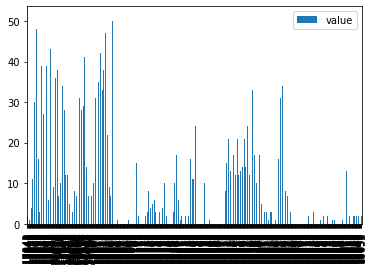

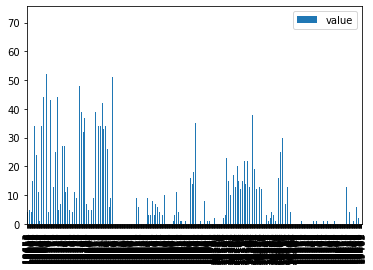

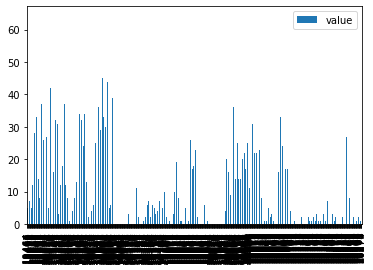

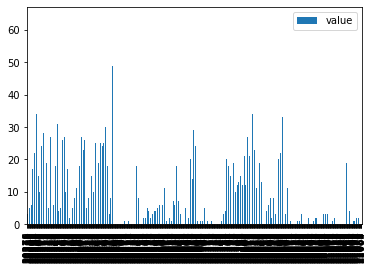

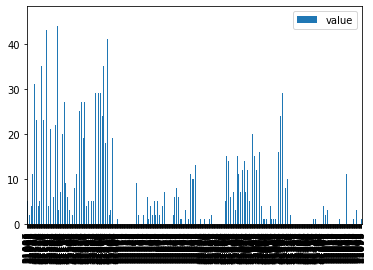

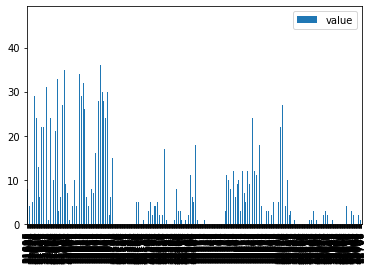

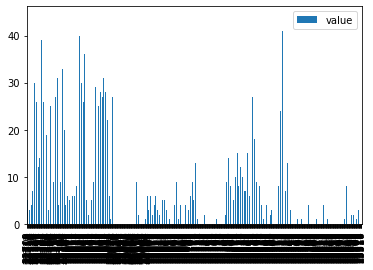

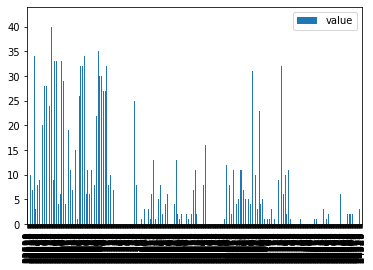

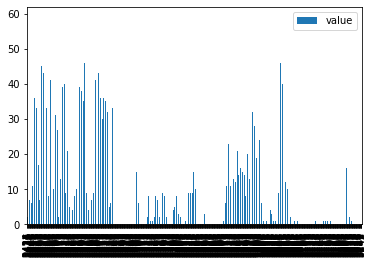

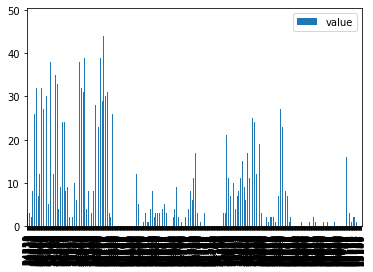

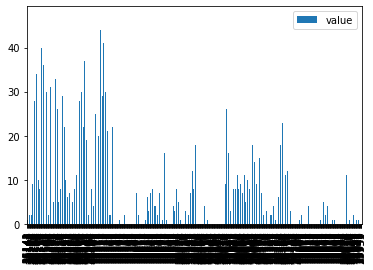

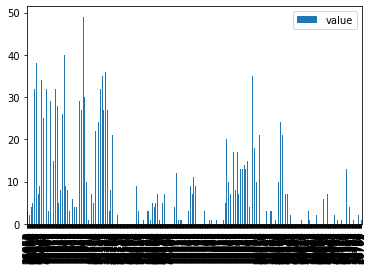

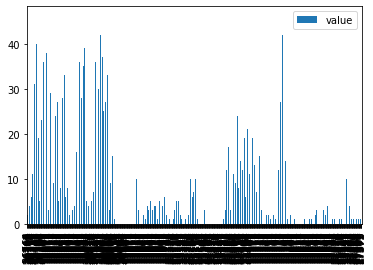

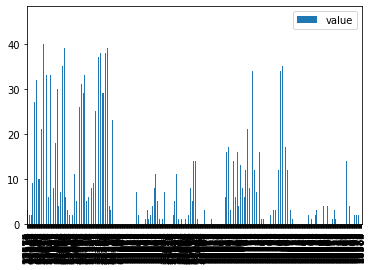

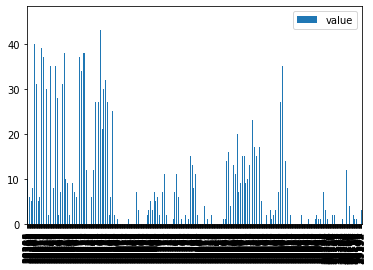

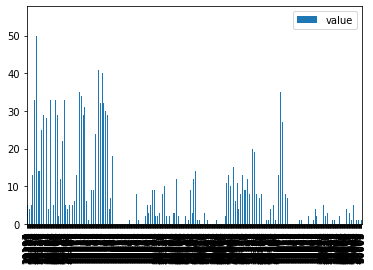

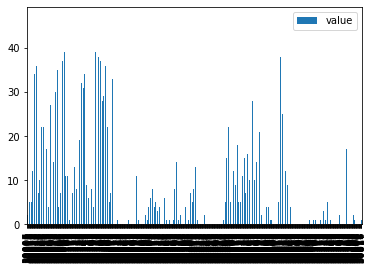

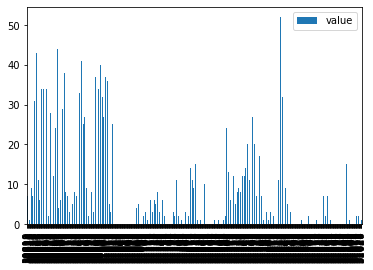

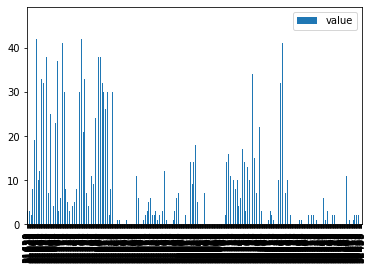

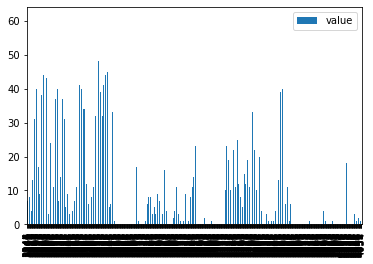

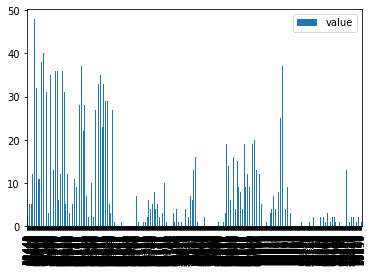

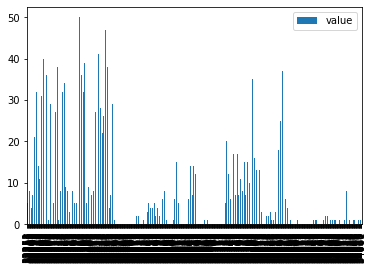

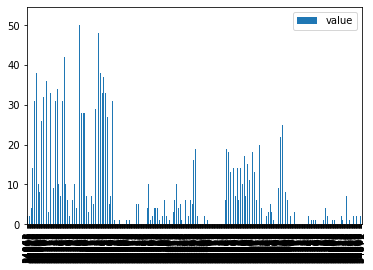

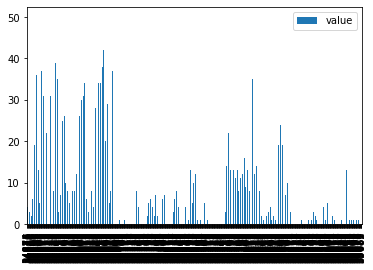

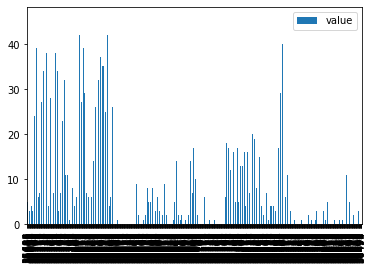

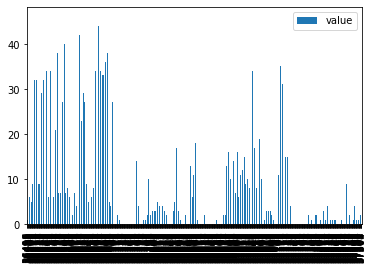

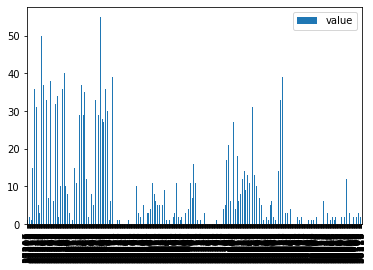

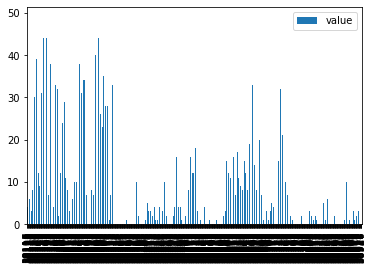

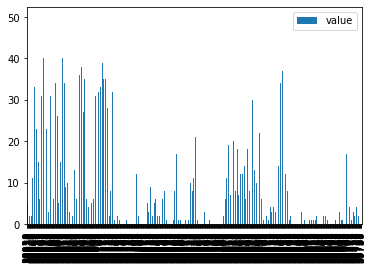

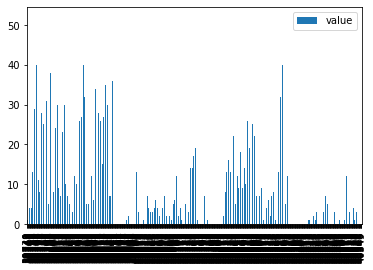

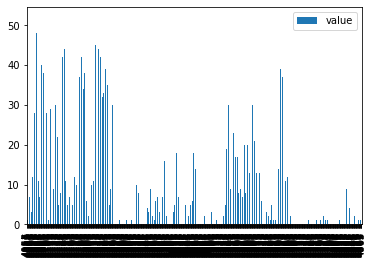

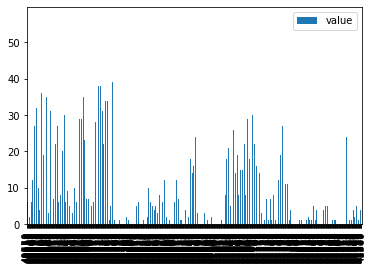

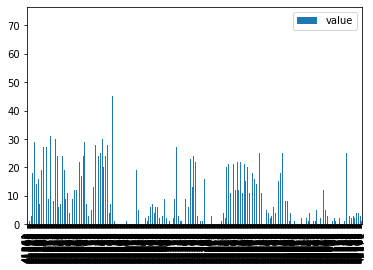

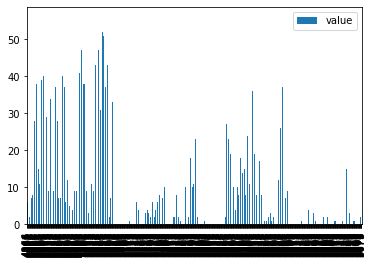

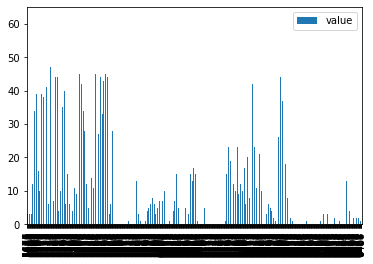

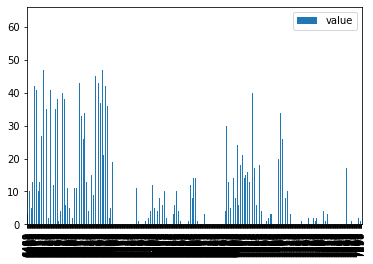

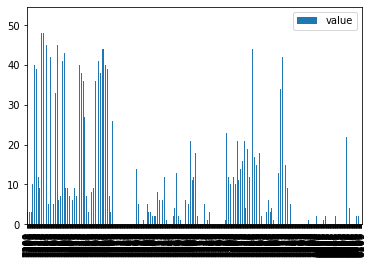

In [22]:
Week.plot.bar()

In [ ]:
Week.plot.area()

In [ ]:
data.max()

## Count average sells in all weeks
df['Mean']=df.mean(axis=1)

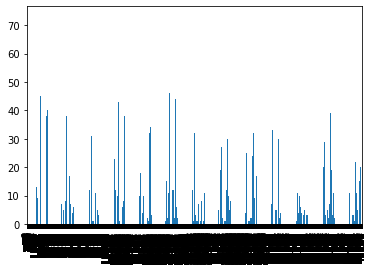

In [23]:
data_mean=data.mean(axis=1)
data_mean
data_mean.plot.bar()
#df.groupby("P2").mean()
#P_2=df.groupby("P2").mean()
#P_2.max()


## Sorting the Mean value 
df["Col"].sort_value()

Result: Week 24,15,16 and 18 shows highest mean sell, and week 26 shows the lowest sell. Total mean sell is 8.94

In [24]:
data_Sorted_Mean=data_mean.sort_values(ascending=False)
#data_Sorted_Mean
#data_Sorted_Mean.mean()

In [25]:
data.mean() #mean sell is 8.63

value    8.898961
dtype: float64

## Query method to count weeks that has sell more (or less) than average sell

Result=25 weeks has highest sell

In [ ]:
data.query("Mean>8.94")
len(data.query("Mean>8.94"))

In [ ]:
data.query("Mean<8.94")
#len(df.query("Mean<8.94"))

In [ ]:
print(data.P1.max())
print(data.P1.min())

In [ ]:
# Weeks that have highest sales  
Total_sale  = data.groupby('week').sum()
Total_sale.sort_values(by="value", ascending=False)

In [26]:
Weeks = ['W0', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8',
       'W9', 'W10', 'W11', 'W12', 'W13', 'W14', 'W15', 'W16', 'W17', 'W18',
       'W19', 'W20', 'W21', 'W22', 'W23', 'W24', 'W25', 'W26', 'W27', 'W28',
       'W29', 'W30', 'W31', 'W32', 'W33', 'W34', 'W35', 'W36', 'W37', 'W38',
       'W39', 'W40', 'W41', 'W42', 'W43', 'W44', 'W45', 'W46', 'W47', 'W48',
       'W49', 'W50', 'W51']       #Name of weeks

plt.bar(Weeks,Total_sale)
plt.ylabel('Sales in total')
plt.xlabel('Weeks')

NameError: name 'Total_sale' is not defined

In [ ]:
data.index.get_loc(p1_Max)

In [ ]:
DM=data.max()
DM

In [ ]:
DM.hist(bins=100)

In [ ]:
DM.plot.area()

In [ ]:
DM.plot.bar()

In [ ]:
DMd=data.median().plot.area()
DMd #.plot.area()

In [ ]:
data.plot.scatter(x="W0", y="W1")

In [ ]:
data.plot.box()

In [ ]:
data.iloc[:, 0:10].plot.density()

In [ ]:
max_sell=data.max() #maximum sells in all weeks
max_sell
min_sell=data.min()
#mean_sell=df.mean()
#print(str("maximum sell is:"),max_sell.max())
#print(min_sell)
#print(mean_sell)

In [ ]:
data.max().max() #maximum sell in all weeks, 73 

In [ ]:
df.min().min()

In [ ]:
data.mean().mean() #mean sell is 8.63

In [ ]:
df.columns.unique

In [ ]:
df.isna().sum()

In [ ]:
df[["MIN", "MAX"]]

In [ ]:
#df.loc[0]

In [ ]:
df.max()

In [ ]:
df.idxmax(axis=0)

In [ ]:
#df.loc["W4"].max()
#df.loc["P1", "W0"].max() #highest sale for P1 and w0
#print(df.loc['P1':'P819', 'MAX',"MIN"])
df.loc['P1':'P819', 'MIN']


In [ ]:
df["W0"]

In [ ]:
df.columns.get_loc("W51")# to get index number of column W51
df.index.get_loc("P1") # to get coloum number of index P1

In [ ]:


data.boxplot()

In [ ]:
plt.plot(data["Product_Code"], df["MIN"])
plt.show()

In [ ]:
plt.plot(data["Product_Code"], df["MAX"])
plt.show()

In [ ]:
#df.reset_index()
#df.reindex(index=df["Product_Code"])


In [ ]:

q_1=data[0:14] # first quarter of the year; 1 to 13th weeks 
q_2=data[15:28] #second quarter of the year; 14th to 26th weeks
q_3=data[29:41]
q_4=data[42:53]
q_1

In [ ]:
plt.plot(q_1, "Mean")
plt.xticks(rotation=90)
plt.xlabel('Week')
plt.ylabel('Sells')
plt.title("Weekly product sells, 1-13")
plt.show()